# Maximum Likelihood Estimation (MLE)

## Overview

**Maximum Likelihood Estimation (MLE)** is a fundamental method for estimating the parameters of a statistical model. Given observed data, MLE finds the parameter values that make the observed data most probable.

## Mathematical Formulation

### The Likelihood Function

Given:
- Observed data: $X = \{x_1, x_2, ..., x_n\}$
- Probability distribution with parameters $\theta$: $f(x|\theta)$

The **likelihood function** is:
$$L(\theta|X) = \prod_{i=1}^{n} f(x_i|\theta)$$

This represents the probability of observing the data $X$ given the parameters $\theta$.

### Log-Likelihood

In practice, we work with the **log-likelihood** to avoid numerical underflow:
$$\ell(\theta|X) = \log L(\theta|X) = \sum_{i=1}^{n} \log f(x_i|\theta)$$

### The MLE Estimator

The MLE estimator is:
$$\hat{\theta}_{MLE} = \arg\max_{\theta} \ell(\theta|X)$$

This is found by solving:
$$\frac{\partial \ell}{\partial \theta} = 0$$

## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm, expon

## Example 1: Normal Distribution

### Analytical Solution

For a normal distribution $N(\mu, \sigma^2)$, the MLE estimators are:

$$\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n} x_i = \bar{x}$$

$$\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n} (x_i - \bar{x})^2$$

### Derivation

The log-likelihood for normal distribution:
$$\ell(\mu, \sigma) = -\frac{n}{2}\log(2\pi) - n\log(\sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2$$

In [2]:
# Generate sample data from known normal distribution
np.random.seed(42)
true_mu = 5.0
true_sigma = 2.0
n_samples = 1000

data = np.random.normal(true_mu, true_sigma, n_samples)

print(f"True parameters: μ = {true_mu}, σ = {true_sigma}")
print(f"Sample size: {n_samples}")

True parameters: μ = 5.0, σ = 2.0
Sample size: 1000


In [3]:
def normal_log_likelihood(params, data):
    """
    Compute the negative log-likelihood for a normal distribution.
    
    Args:
        params: [mu, sigma] - mean and standard deviation
        data: observed data points
    
    Returns:
        Negative log-likelihood (for minimization)
    """
    mu, sigma = params
    if sigma <= 0:
        return np.inf
    
    n = len(data)
    log_likelihood = -n/2 * np.log(2*np.pi) - n * np.log(sigma) \
                     - 1/(2*sigma**2) * np.sum((data - mu)**2)
    
    return -log_likelihood  # Return negative for minimization

In [4]:
# Numerical optimization approach
initial_guess = [0, 1]  # Starting point for optimization

result = minimize(
    normal_log_likelihood,
    initial_guess,
    args=(data,),
    method='Nelder-Mead'
)

mu_mle, sigma_mle = result.x

print(f"MLE estimates (numerical): μ = {mu_mle:.4f}, σ = {sigma_mle:.4f}")

MLE estimates (numerical): μ = 5.0387, σ = 1.9575


In [5]:
# Analytical MLE for comparison
mu_analytical = np.mean(data)
sigma_analytical = np.sqrt(np.mean((data - mu_analytical)**2))

print(f"MLE estimates (analytical): μ = {mu_analytical:.4f}, σ = {sigma_analytical:.4f}")
print(f"True parameters:            μ = {true_mu:.4f}, σ = {true_sigma:.4f}")

MLE estimates (analytical): μ = 5.0387, σ = 1.9575
True parameters:            μ = 5.0000, σ = 2.0000


### Visualization of the Likelihood Surface

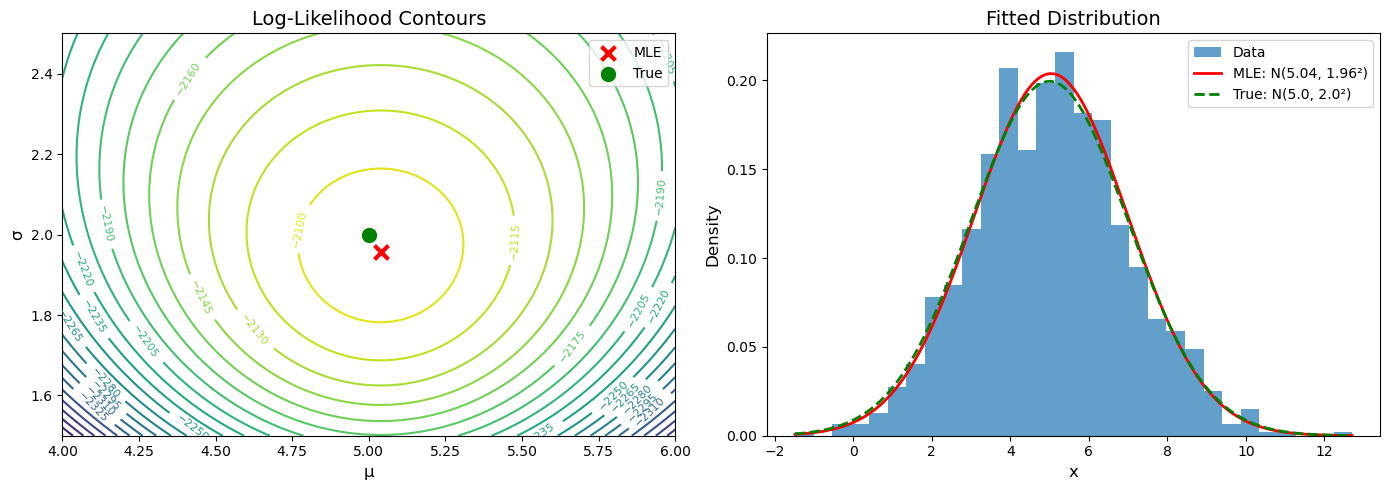

In [6]:
# Create grid for likelihood surface
mu_range = np.linspace(4, 6, 100)
sigma_range = np.linspace(1.5, 2.5, 100)
MU, SIGMA = np.meshgrid(mu_range, sigma_range)

# Compute log-likelihood for each point
log_likelihood_surface = np.zeros_like(MU)
for i in range(len(sigma_range)):
    for j in range(len(mu_range)):
        log_likelihood_surface[i, j] = -normal_log_likelihood(
            [mu_range[j], sigma_range[i]], data
        )

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Contour plot
cs = axes[0].contour(MU, SIGMA, log_likelihood_surface, levels=30)
axes[0].clabel(cs, inline=True, fontsize=8)
axes[0].scatter(mu_mle, sigma_mle, c='red', s=100, marker='x', linewidths=3, label='MLE')
axes[0].scatter(true_mu, true_sigma, c='green', s=100, marker='o', label='True')
axes[0].set_xlabel('μ', fontsize=12)
axes[0].set_ylabel('σ', fontsize=12)
axes[0].set_title('Log-Likelihood Contours', fontsize=14)
axes[0].legend()

# Histogram with fitted distribution
axes[1].hist(data, bins=30, density=True, alpha=0.7, label='Data')
x_plot = np.linspace(min(data), max(data), 200)
axes[1].plot(x_plot, norm.pdf(x_plot, mu_mle, sigma_mle), 'r-', 
             linewidth=2, label=f'MLE: N({mu_mle:.2f}, {sigma_mle:.2f}²)')
axes[1].plot(x_plot, norm.pdf(x_plot, true_mu, true_sigma), 'g--', 
             linewidth=2, label=f'True: N({true_mu}, {true_sigma}²)')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Fitted Distribution', fontsize=14)
axes[1].legend()

plt.tight_layout()
plt.show()

## Example 2: Exponential Distribution

For an exponential distribution with rate parameter $\lambda$:

$$f(x|\lambda) = \lambda e^{-\lambda x}, \quad x \geq 0$$

The MLE estimator is:
$$\hat{\lambda} = \frac{n}{\sum_{i=1}^{n} x_i} = \frac{1}{\bar{x}}$$

In [7]:
# Generate exponential data
true_lambda = 2.0
exp_data = np.random.exponential(scale=1/true_lambda, size=n_samples)

def exponential_log_likelihood(lmbda, data):
    """Negative log-likelihood for exponential distribution."""
    if lmbda <= 0:
        return np.inf
    n = len(data)
    log_likelihood = n * np.log(lmbda) - lmbda * np.sum(data)
    return -log_likelihood

# Numerical MLE
result_exp = minimize(
    exponential_log_likelihood,
    x0=[1.0],
    args=(exp_data,),
    method='Nelder-Mead'
)

lambda_mle = result_exp.x[0]

# Analytical MLE
lambda_analytical = 1 / np.mean(exp_data)

print(f"True λ:              {true_lambda:.4f}")
print(f"MLE λ (numerical):   {lambda_mle:.4f}")
print(f"MLE λ (analytical):  {lambda_analytical:.4f}")

True λ:              2.0000
MLE λ (numerical):   1.9842
MLE λ (analytical):  1.9842


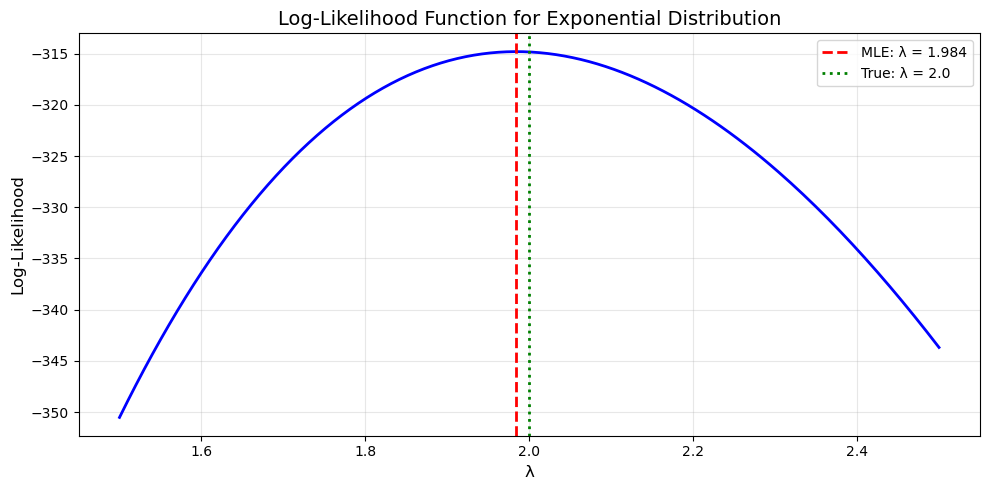

In [8]:
# Visualize likelihood function for exponential
lambda_range = np.linspace(1.5, 2.5, 200)
log_likelihood_values = [-exponential_log_likelihood(l, exp_data) for l in lambda_range]

plt.figure(figsize=(10, 5))
plt.plot(lambda_range, log_likelihood_values, 'b-', linewidth=2)
plt.axvline(lambda_mle, color='r', linestyle='--', linewidth=2, label=f'MLE: λ = {lambda_mle:.3f}')
plt.axvline(true_lambda, color='g', linestyle=':', linewidth=2, label=f'True: λ = {true_lambda}')
plt.xlabel('λ', fontsize=12)
plt.ylabel('Log-Likelihood', fontsize=12)
plt.title('Log-Likelihood Function for Exponential Distribution', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Properties of MLE

| Property | Description |
|----------|-------------|
| **Consistency** | As $n \to \infty$, $\hat{\theta}_{MLE} \to \theta_{true}$ |
| **Asymptotic Normality** | For large $n$, $\hat{\theta}_{MLE} \sim N(\theta, I(\theta)^{-1})$ |
| **Efficiency** | MLE achieves the Cramér-Rao lower bound asymptotically |
| **Invariance** | If $\hat{\theta}$ is MLE of $\theta$, then $g(\hat{\theta})$ is MLE of $g(\theta)$ |

## Fisher Information and Confidence Intervals

The **Fisher Information** measures the amount of information data carries about a parameter:

$$I(\theta) = -E\left[\frac{\partial^2 \ell}{\partial \theta^2}\right]$$

The variance of the MLE is approximately:
$$\text{Var}(\hat{\theta}) \approx \frac{1}{I(\theta)}$$

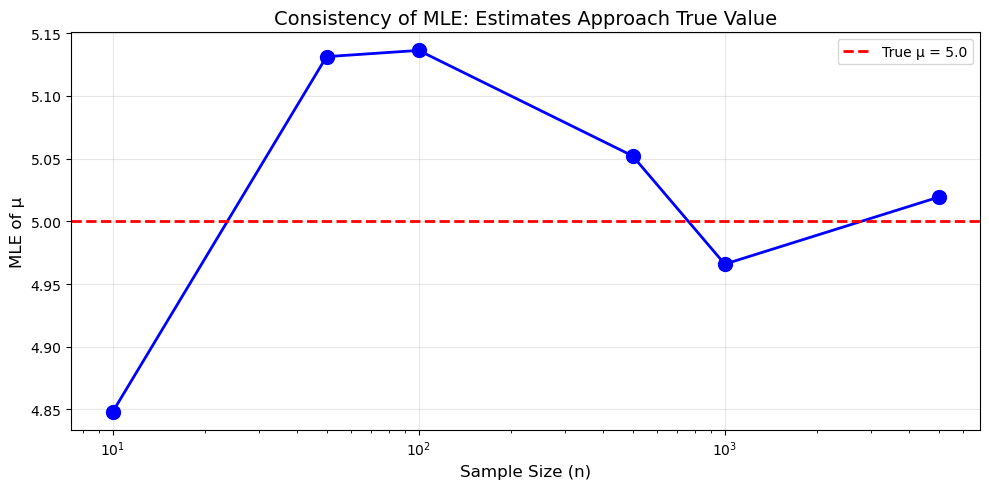

In [10]:
# Demonstrate consistency: MLE improves with sample size
sample_sizes = [10, 50, 100, 500, 1000, 5000]
mu_estimates = []

for n in sample_sizes:
    sample = np.random.normal(true_mu, true_sigma, n)
    mu_estimates.append(np.mean(sample))

plt.figure(figsize=(10, 5))
plt.semilogx(sample_sizes, mu_estimates, 'bo-', markersize=10, linewidth=2)
plt.axhline(true_mu, color='r', linestyle='--', linewidth=2, label=f'True μ = {true_mu}')
plt.xlabel('Sample Size (n)', fontsize=12)
plt.ylabel('MLE of μ', fontsize=12)
plt.title('Consistency of MLE: Estimates Approach True Value', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

**Maximum Likelihood Estimation** is:

### Advantages
- ✅ Consistent and efficient
- ✅ Has well-understood asymptotic properties
- ✅ Invariant under parameter transformations
- ✅ Provides a principled framework for parameter estimation

### Disadvantages
- ❌ Can be computationally expensive for complex models
- ❌ May converge to local maxima
- ❌ Requires specification of the likelihood function
- ❌ May be biased for small samples

### Applications
- Fitting probability distributions
- Regression models
- Machine learning (logistic regression, neural networks)
- Time series analysis